In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import os
from torchFit import trainingLoop

In [2]:
device = 'cuda'


In [3]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(28*28, 128)
        self.layer2 = nn.Linear(128, 64)
        self.layer3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the input
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.layer3(x)
        return x
        
 


In [4]:
 
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(0.5, 0.5)])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=1024, shuffle=True)

test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
validation_loader = DataLoader(test_dataset, batch_size=1024, shuffle=False)




model = SimpleNN().to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

In [5]:

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(0.5, 0.5)])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
validation_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)



In [6]:
model = SimpleNN().to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)


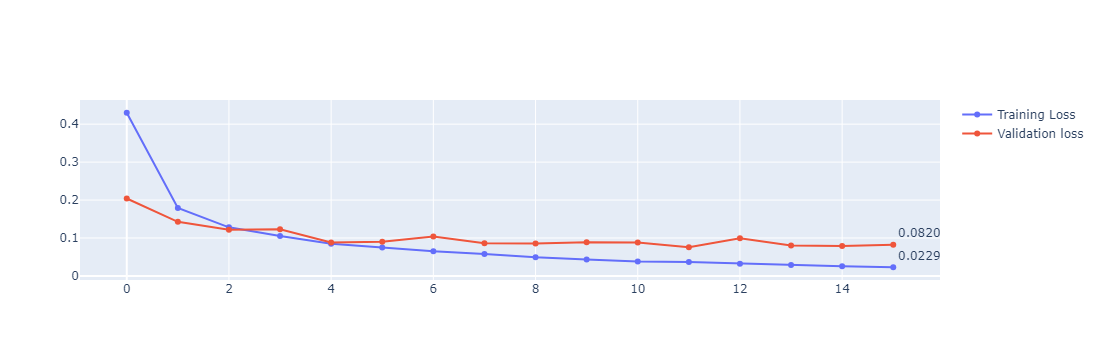

Epoch [016/216] || Training Loss -- 0.0230 || Validation Loss -- 0.0821 |


In [ ]:
trainingLoop(model, train_loader, 216, loss_fn, optimizer, validation_loader = validation_loader, resume=False, device=device)